## Exploratory Data Analysis

##### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Import the modified dataframe from the data cleaning notebook


In [3]:
#Importamos y guardamos el dataframe

import pandas as pd

RUTA_DATAFRAME = '../data/interim/df_final.csv'

df = pd.read_csv(RUTA_DATAFRAME, sep=',')

In [4]:
df

,CCAA,SEXOa,EDADa,E1_1,E1C,E1E,E2_1a,E2_1b,E2_1c,E2_1d,...,W129,X130,X131,X132,Y133,CLASE_PR,IMC,SEVERIDAD_DEPRESIVA,CUADROS_DEPRESIVOS,dep_anx
0,16.0,1.0,60.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,9.0,4.0,1.0,2.0,0,5.0,2.0,1.0,3.0,0
1,16.0,2.0,87.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,3.0,1.0,2.0,0,1.0,9.0,3.0,3.0,0
2,16.0,1.0,38.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,9.0,4.0,1.0,4.0,0,4.0,3.0,3.0,2.0,0
3,16.0,2.0,43.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,8.0,2.0,1.0,2.0,1,1.0,2.0,1.0,3.0,0
4,16.0,1.0,41.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,...,NaN,4.0,1.0,5.0,0,4.0,3.0,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22067,19.0,1.0,23.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,1.0,1.0,2.0,0,5.0,3.0,1.0,3.0,0
22068,19.0,2.0,31.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,4.0,1.0,2.0,0,2.0,2.0,1.0,3.0,0
22069,19.0,2.0,79.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,4.0,1.0,1.0,0,9.0,3.0,1.0,3.0,0
22070,19.0,2.0,60.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,NaN,4.0,1.0,2.0,0,5.0,3.0,1.0,3.0,0


The modified dataframe contains rows: 22072, columns : 348

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22072 entries, 0 to 22071
Columns: 348 entries, CCAA to dep_anx
dtypes: float64(136), int64(212)
memory usage: 58.6 MB


Creating a copy of the imported dataframe to preserve it as more modifications will be conducted:

In [6]:
clean_df = df.copy()

### Loading Json dictionary file


On the notebook json_maker.ipynb we created a json dictionary file 'full_var_dict.json' containing the original variable name, a descriptive variable name, as well as a brief description of each of the variable values. The goal of this file is to ease the EDA and to produce graphs easier to read and understand with informative titles and descriptions of the categories of each variable.

In [8]:
import json

# JSON file source
ruta_json = "../data/json_files/full_var_dict.json"

# loading JSON file
with open(ruta_json, 'r') as archivo:
    varijson = json.load(archivo)


Example of how the JSON file looks: this is the dictionary of the variable CCAA

In [18]:
varijson['CCAA']

{'diccionario': {'01': 'Andalucía',
  '02': 'Aragón',
  '03': 'Asturias, Principado de',
  '04': 'Balears, Illes',
  '05': 'Canarias',
  '06': 'Cantabria',
  '07': 'Castilla y León',
  '08': 'Castilla - La Mancha',
  '09': 'Cataluña',
  '10': 'Comunitat Valenciana',
  '11': 'Extremadura',
  '12': 'Galicia',
  '13': 'Madrid, Comunidad de',
  '14': 'Murcia, Región de',
  '15': 'Navarra, Comunidad Foral de',
  '16': 'País Vasco',
  '17': 'Rioja, La',
  '18': 'Ceuta',
  '19': 'Melilla'},
 'Descripción': 'Comunidad Autónoma de residencia'}

This function will be applied to the EDA graphs. It parses the JSON file to recover a descriptive variable name (e.g., title), the category values of a variable (e.g., values), and the actual category names inside a variable (e.g., categories)

In [19]:

def parse_json(columna):
    categories = list(varijson[columna]['diccionario'].values())
    categories = [str(cat) for cat in categories]

    values=list(varijson[columna]['diccionario'].keys())
    values = [int(cat) for cat in values]
    
    title = varijson[columna]['Descripción']

    return values, categories, title

### Univariate analysis

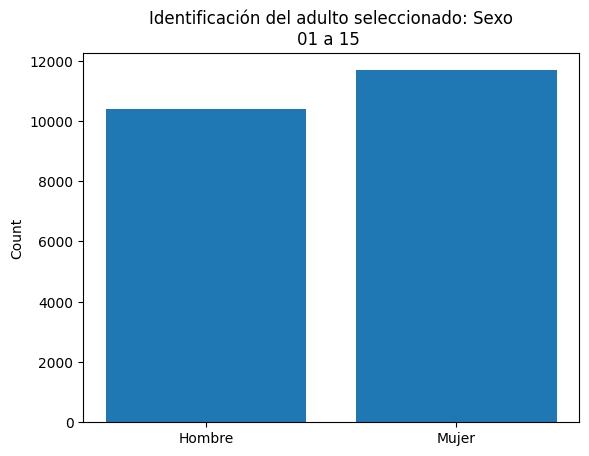

In [22]:
var_x = 'SEXOa'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)


plt.xticks(values, categories)


# Muestra el gráfico
plt.show()


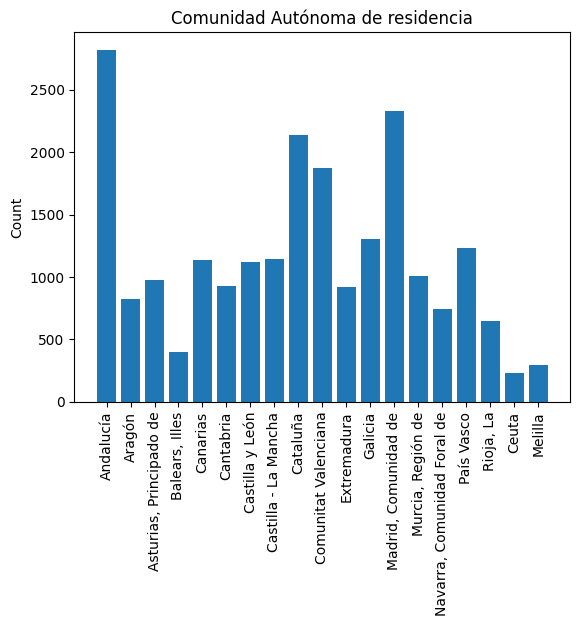

In [23]:
var_x = 'CCAA'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

Countplot de fumadores

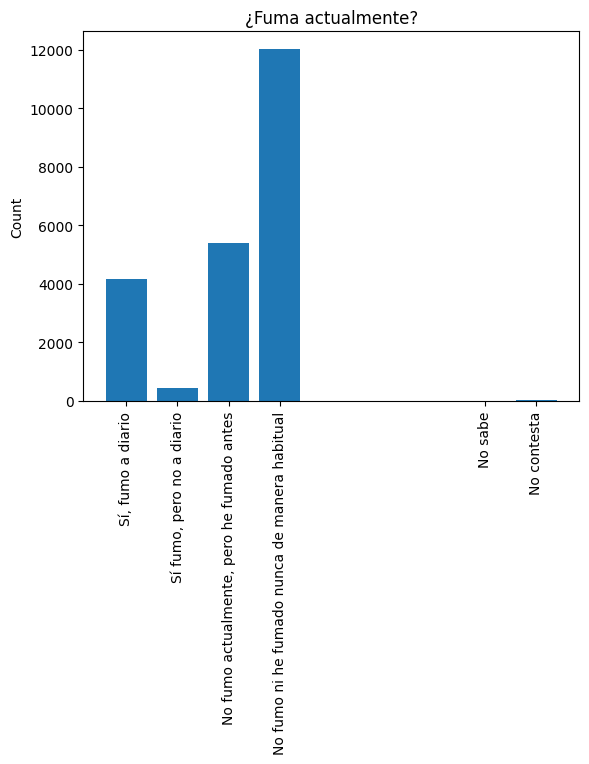

In [24]:
var_x = 'V121'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)


plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

Tiene nacionalidad Española

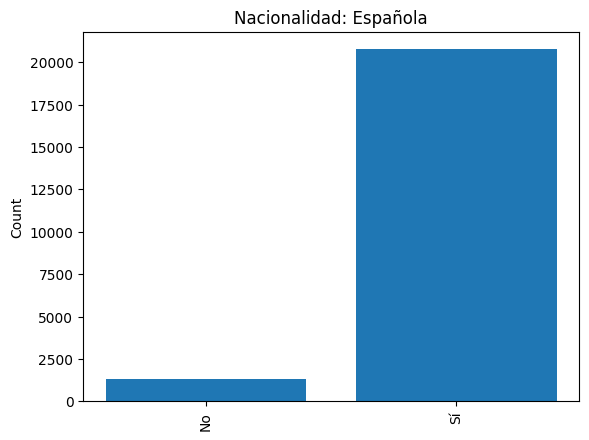

In [58]:
var_x = 'E2_1a'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories, rotation = 90)


# Muestra el gráfico
plt.show()

Estado civil

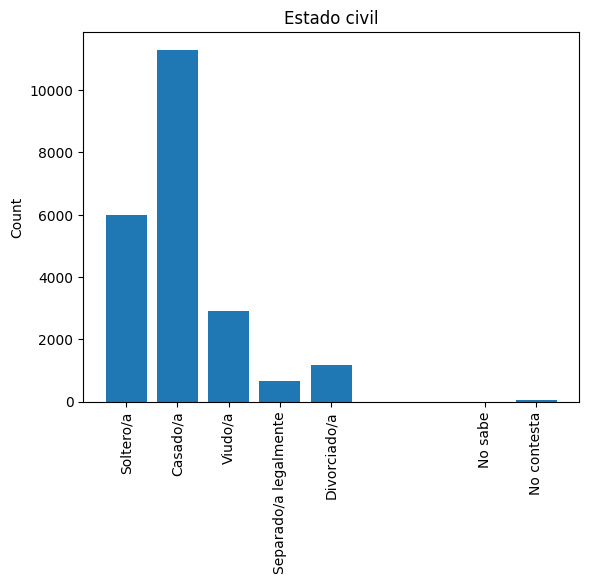

In [59]:
var_x = 'E4b'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()
values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)


plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

Estado salud 12 meses

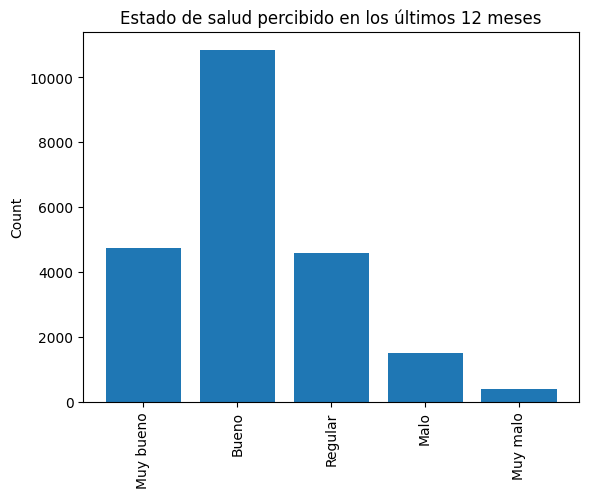

In [62]:
var_x = 'G21'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories, rotation = 90)

# Muestra el gráfico
plt.show()

#### Target

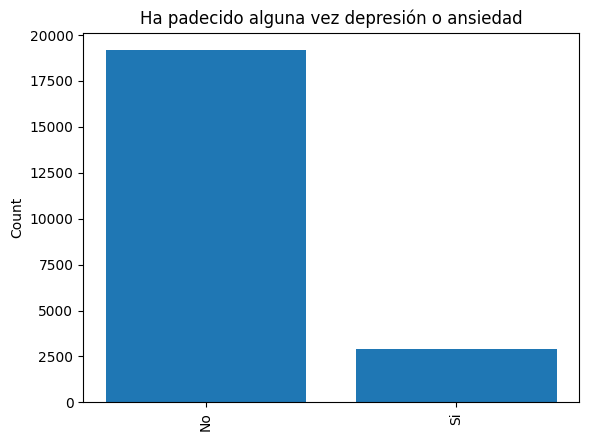

In [63]:
var_x = 'dep_anx'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title('Ha padecido alguna vez depresión o ansiedad')

plt.xticks([0,1], ['No','Si'], rotation = 90)

# Muestra el gráfico
plt.show()

Antidepresivos consumidos

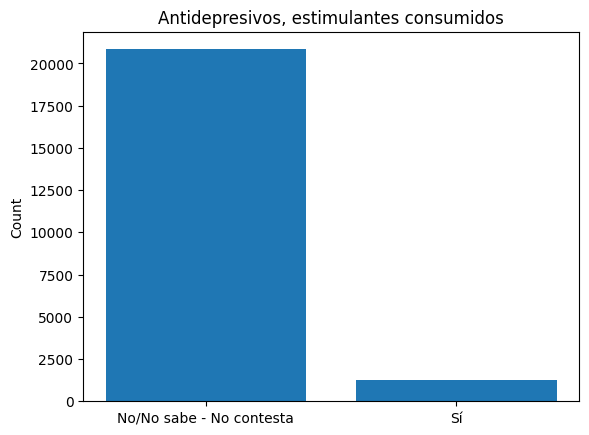

In [65]:
var_x = 'P87_14a'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories)

# Muestra el gráfico
plt.show()

Antidepresivos recetados

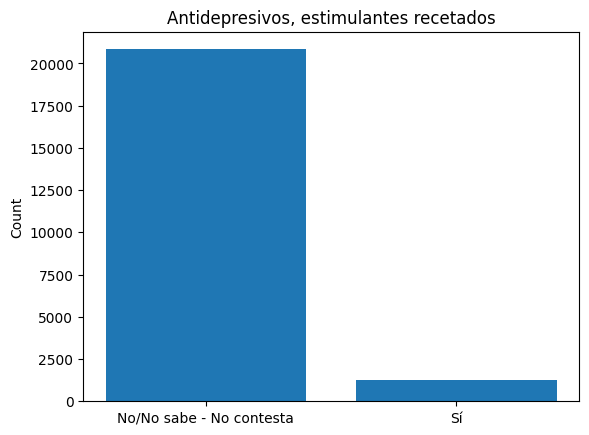

In [67]:
var_x = 'P87_14b'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories)

# Muestra el gráfico
plt.show()

Tranquilizantes, relajantes, pastillas para dormir consumidas


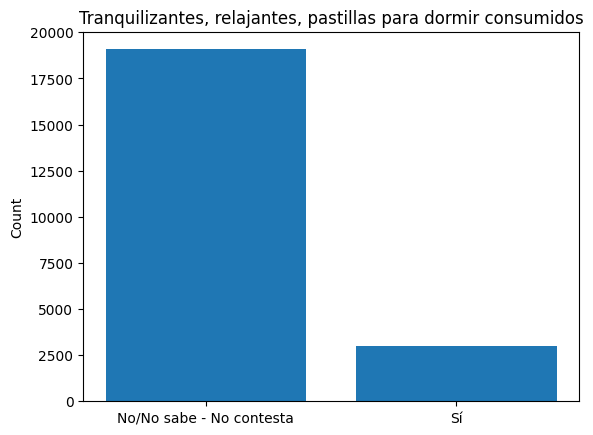

In [68]:
var_x = 'P87_7a'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories)

# Muestra el gráfico
plt.show()

In [ ]:
clean_df['P87_7a'].value_counts()

P87_7a
0    19077
1     2995
Name: count, dtype: int64

Tranquilizantes, relajantes, pastillas para dormir recetadas


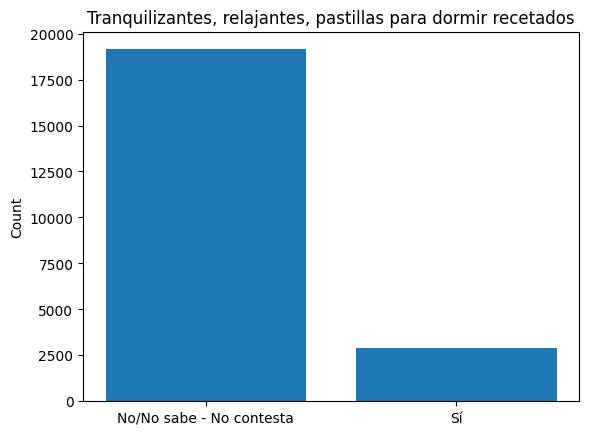

In [69]:


var_x = 'P87_7b'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories)

# Muestra el gráfico
plt.show()

In [ ]:
clean_df['P87_7b'].value_counts()

P87_7b
0    19147
1     2925
Name: count, dtype: int64

Consumo de comida rapida  
- U120_13

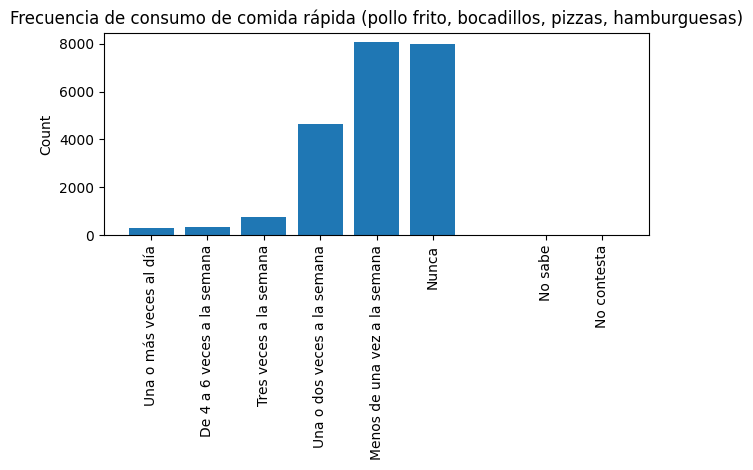

In [72]:


var_x = 'U120_13'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories, rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_single_numerical_variable(dataframe, column):

    fig, axis = plt.subplots(2, 1, figsize=(8, 4), gridspec_kw={'height_ratios': [6, 1]})

    # Calcula la media, mediana y desviación estándar de los datos
    media = np.mean(dataframe[column])
    mediana = np.median(dataframe[column])
    desviacion_estandar = np.std(dataframe[column])

    # Crear una figura múltiple con histogramas y diagramas de caja
    sns.histplot(ax=axis[0], data=dataframe, kde=True, x=column).set(xlabel=None)
    axis[0].axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Media: {media:.2f}' )
    axis[0].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana:.2f}')
    axis[0].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1, label=f'Desviación Estándar: {desviacion_estandar:.2f}')
    axis[0].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

    sns.boxplot(ax=axis[1], data=dataframe, x=column).set(xlabel=None)
    axis[1].axvline(media, color='red', linestyle='dashed', linewidth=1, label='Media')
    axis[1].axvline(mediana, color='orange', linestyle='dashed', linewidth=1, label='Mediana')
    axis[1].axvline(media + desviacion_estandar, color='green', linestyle='dashed', linewidth=1)
    axis[1].axvline(media - desviacion_estandar, color='green', linestyle='dashed', linewidth=1)

    axis[0].legend()

    fig.suptitle(column)

    # Ajustar el layout
    plt.tight_layout()

    # Mostrar el plot
    plt.show()

# Uso del código
# Supongamos que 'data' es tu DataFrame y 'variable' es la columna que deseas graficar
# plot_single_numerical_variable(data, 'variable')


Edad

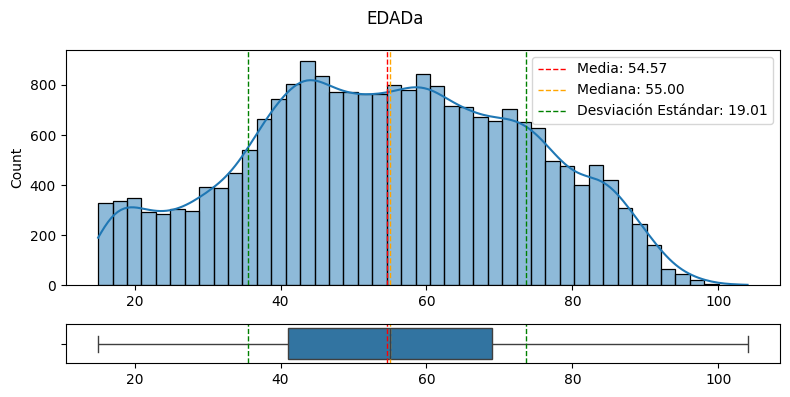

In [ ]:
plot_single_numerical_variable(clean_df, 'EDADa')

Consumo de fruta
- U120_1

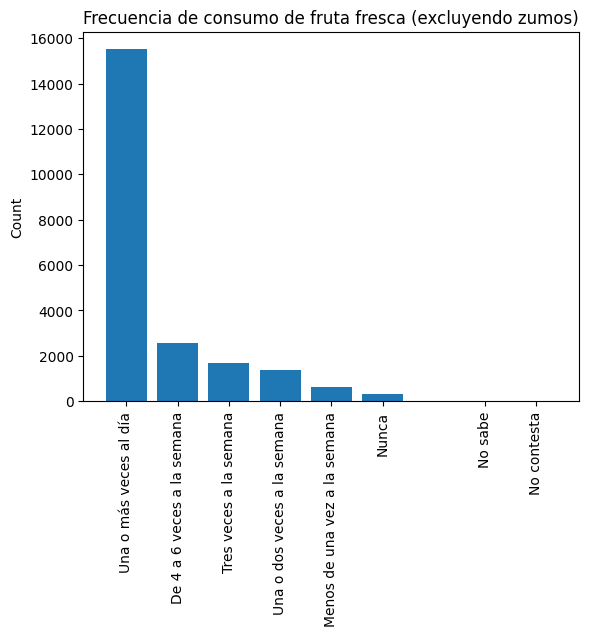

In [74]:
var_x = 'U120_1'

# Obtén los valores únicos y sus recuentos
counts = clean_df[var_x].value_counts()

values, categories, title= parse_json(var_x)

# Crea el gráfico de barras
plt.bar(counts.index, counts.values)

# Personaliza el gráfico
plt.xlabel('')
plt.ylabel('Count')
plt.title(title)

plt.xticks(values, categories, rotation=90)

# Muestra el gráfico
plt.show()